In [25]:
import sys
sys.path.append('/home/zhenyujin/qso_fitting/')
import numpy as np
import h5py
from qso_fitting.analysis.inf_test import run_inference_test, compute_importance_weights, C_ge, inference_test_plot
from matplotlib import pyplot as plt
from IPython import embed
import os
import corner
import matplotlib.lines as mlines
import IPython
import dill

In [27]:
redshift = 5.4
zs = np.array([5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0])
z_idx = np.argmin(np.abs(zs - redshift))
z_strings = ['z54', 'z55', 'z56', 'z57', 'z58', 'z59', 'z6']
z_string = z_strings[z_idx]

n_inference = 100
in_path_hdf5 = os.path.expanduser('~') + f'/igm_emulator/igm_emulator/hmc/hmc_results/'
note = f"{z_string}_inference_{n_inference}_samples_1000_chains_4_small_bins_retrain"
print('reading in')
with h5py.File(in_path_hdf5 + f'{note}.hdf5', 'r') as f:
    # IPython.embed()
    true_theta = f['true_theta'][:, :]
    log_prob = f['log_prob'][:, :]
    true_log_prob = f['true_log_prob'][:]
    samples = f['samples'][:, :, :]
    infer_theta = f['infer_theta'][:, :]

reading in


In [28]:
print(log_prob.shape)

(100, 4000)


In [29]:
alpha_vec = np.concatenate((np.linspace(0.00, 0.994, num=100), np.linspace(0.995, 1.0, num=51)))
coverage_gauss, coverage_gauss_lo, coverage_gauss_hi = run_inference_test(log_prob, true_log_prob, alpha_vec,
                                                                              title='Gaussian Lhood', show=False)

-------------------------------------------------------------------------
Full Inference test results for nqsos=100
-------------------------------------------------------------------------
Full    : 0.0 + 0.0 - 0.0 % for alpha=0.000 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=1.004 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=2.008 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=3.012 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=4.016 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=5.020 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=6.024 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=7.028 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=8.032 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=9.036 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=10.040 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=11.044 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=12.048 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=13.053 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=14.057 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=15.061 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=16.065 %
Full    : 0.0 + 0.0 -

In [30]:
inference_test_plot(alpha_vec, prob, prob_lo, prob_hi,)

NameError: name 'prob' is not defined

In [31]:
x_size = 3.5
dpi_value = 200

plt_params = {'legend.fontsize': 7,
              'legend.frameon': False,
              'axes.labelsize': 8,
              'axes.titlesize': 8,
              'figure.titlesize': 8,
              'xtick.labelsize': 7,
              'ytick.labelsize': 7,
              'lines.linewidth': 1,
              'lines.markersize': 2,
              'errorbar.capsize': 3,
              'font.family': 'serif',
              # 'text.usetex': True,
              'xtick.minor.visible': True,
              }
plt.rcParams.update(plt_params)

print('plotting')

plotting


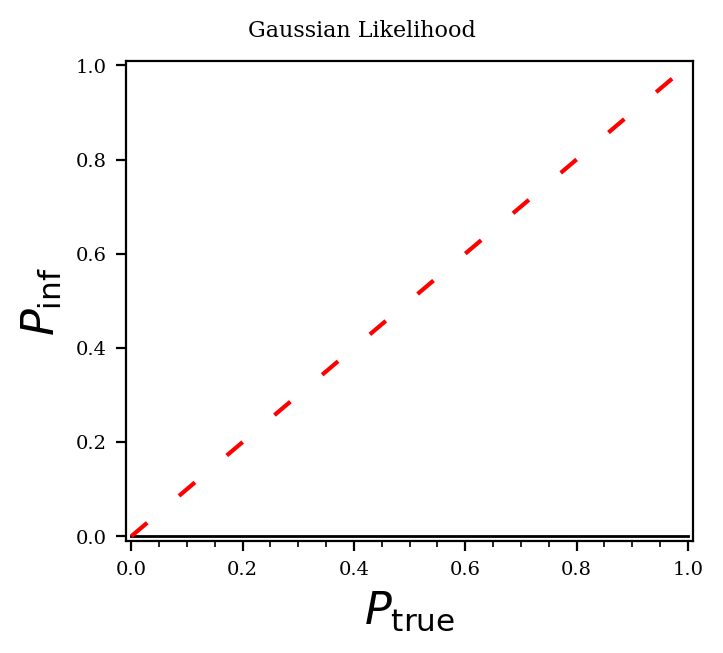

In [32]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo, coverage_gauss_hi, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Gaussian Likelihood')
inference_fig.savefig(out_path + f'{note}.png')